In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

predict continuos variables - regression

### Simple linear regression

y = b0 + b1X1

y => dependent variable
b0 => y intercept
b1 => slope coefficient 
X1 => independent variable

y<sub>i</sub> - y<sub>i</sub><sup>^</sup> = residuals

sum(residuals) => Ordinary least square method

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

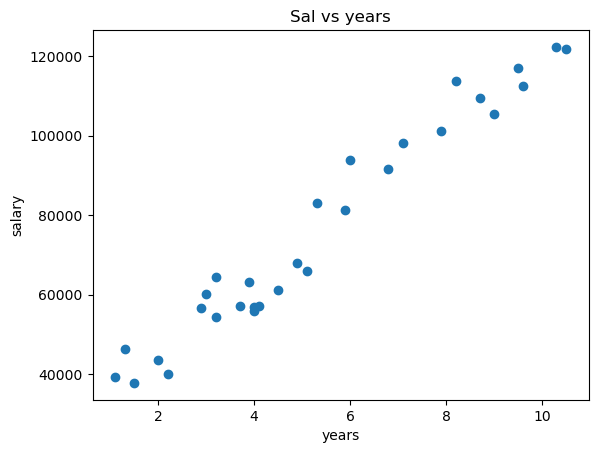

In [6]:
plt.scatter(df.YearsExperience,df.Salary); # linear increase
plt.xlabel("years")
plt.ylabel("salary")
plt.title("Sal vs years");

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary",axis=1)
y = df.Salary

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [10]:
regressor.score(X_test,y_test)

0.8569745226498334

In [11]:
y_preds = regressor.predict(X_test)
y_preds

array([ 75469.54159135, 111945.31883473,  69857.88355391,  73598.9889122 ,
        62375.67283731,  48346.52774371])

In [12]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_preds,y_test)

7308.988912201424

In [13]:
r2_score(y_preds,y_test) # accuracy

0.8505195792290553

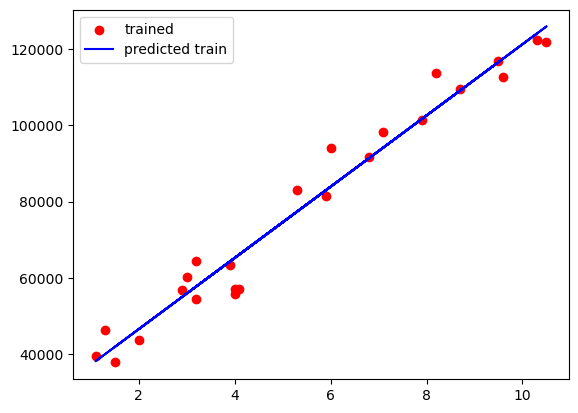

In [14]:
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,color="r",label="trained")
ax.plot(X_train,regressor.predict(X_train),color="b",label="predicted train");
ax.legend();

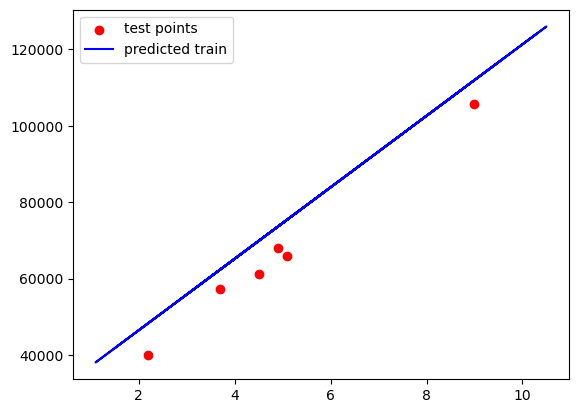

In [15]:
plt.scatter(X_test,y_test,label="test points",color="r")
plt.plot(X_train,regressor.predict(X_train),label="predicted train",color="b")
plt.legend();

### How do I predict the salary if input ("YearsOfGiven") as 12 - To make single prediction

In [16]:
regressor.predict([[12]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([140003.60902195])

How to get the values for <b>b<sub>0</sub></b> and <b>b<sub>1</sub></b>

In [17]:
regressor.coef_,regressor.intercept_

(array([9352.76339574]), 27770.448273079397)

### Multiple linear regression

In [18]:
df_mlr =  pd.read_csv("50_Startups.csv")
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df_mlr.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

multiple linear regression intuition for categorical variables

* never add two dummy variables in the dataset
* D1 , D2 dummy variables 
* intuition is your are duplicating the variable ->  D2 = 1 - D1 (always)

* phenomenon where one or more independent varibles determine the other - > multicolinearility

* <b>dummy variable trap</b> - always eliminate one dummy varible independent of how many dummy variables you have

#### Backward elimination

5 methods for building models

* All in one - prior knowledge, you have to choose all features, preparing for backward elimination
* Backward elimination
* Forward selection
* Bidirectional elimination
* Score comparison

First 3 Stepwise regression

### Backward elimination

* Select significance level to stay in the model
* Fit the full model with all possible predictors
* Consider the predictor with highest P-value P> significance level
* Remove this predictor
* Rebuild the model without the variable
* Loop through until P< significance level

### Forward selection

* 1)Slect significance to enter the model
* 2)Fit all possible simple rergession models.Slect the one with lowest value
* 3)Keep this variable and fit all possible models with one extra predictor added to the ones you already have
* 4)Consider the predictor with lowest P-value. If P<SL move to step


In [21]:
df_mlr.shape

(50, 5)

In [22]:
df_mlr.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [23]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [24]:
def object_To_categorical(df):
    for col,val in df.items():
        if(pd.api.types.is_string_dtype(val)):
            df[col] = val.astype("category").cat.as_ordered()
object_To_categorical(df_mlr)

In [25]:
df_mlr.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [26]:
def categorical_To_numeric(df):
    for col,val in df.items():
        if not pd.api.types.is_numeric_dtype(val):
            df[col]=df[col].cat.codes+1
            
categorical_To_numeric(df_mlr)

In [27]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                 int8
Profit             float64
dtype: object

In [28]:
df_mlr.State.head()

0    3
1    1
2    2
3    3
4    2
Name: State, dtype: int8

In [29]:
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [30]:
X = df_mlr.drop("Profit",axis=1)
y = df_mlr.Profit

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

reg2 = LinearRegression()

reg2.fit(X_train2,y_train2)

LinearRegression()

In [32]:
X_test2.shape,y_test2.shape

((10, 4), (10,))

In [33]:
X_train2.shape,y_train2.shape

((40, 4), (40,))

In [34]:
y_preds = reg2.predict(X_test2)
y_preds

array([126720.66150723,  84909.08961912,  98890.31854876,  46479.31240248,
       129113.18318813,  50968.88397762, 109015.01626803, 100893.57078084,
        97713.73821431, 113085.59056068])

In [35]:
reg2.score(X_test2,y_test2)

0.9000614254946402

In [36]:
reg2.coef_

array([  0.80379465,  -0.06791023,   0.03126059, -16.82030683])

 y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> +  b<sub>2</sub>x<sub>2</sub> + b<sub>3</sub>x<sub>3</sub> + b<sub>4</sub>x<sub>4</sub> 

 y = b<sub>0</sub> + 78x<sub>1</sub> + 69x<sub>2</sub> + 38x<sub>3</sub> - 11x<sub>4</sub>

In [37]:
reg2.intercept_

54097.53715294332

### Polynomial linear regression

In [38]:
df_plr = pd.read_csv("Position_Salaries.csv")
df_plr.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [43]:
X = df_plr.drop(columns=["Position","Salary"],axis=1)
y = df_plr.Salary

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly,y)

LinearRegression()

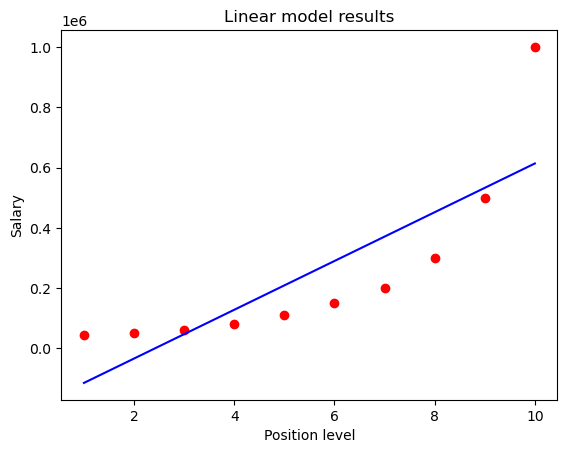

In [61]:
# Visualising the linear regression

plt.scatter(X,y,color="r")
plt.plot(X,lin_reg.predict(X),color="b")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.title("Linear model results");

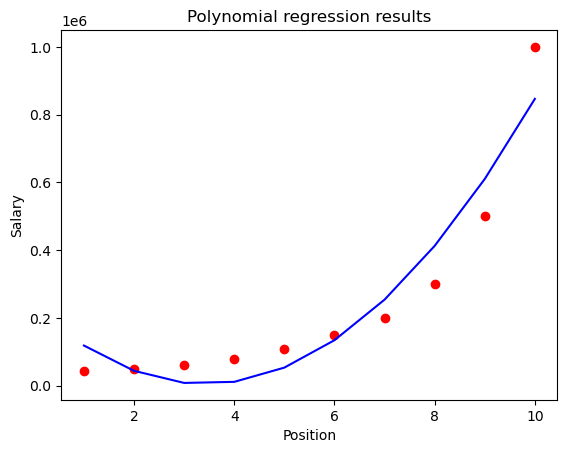

In [62]:
# Visualising the polynomial regression

plt.scatter(X,y,color="r")
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color="b")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Polynomial regression results");

In [63]:
lin_reg.predict([[6.5]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

In [70]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

### Support Vector Regression

#### Intituition
epsilon - Insensitive tube , SVR considers error of any point outside the tube , Any point outide the tube is Support Vector

slack varibales epsilon<sub>i</sub> .... epsilon<sub>n</sub>

minimize (epsilon<sub>i</sub> + epsilon<sub>n</sub>)